# Sales Analysis

In [2]:
import numpy as np
import calendar
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

## Merging Files 

In [3]:
files=[file for  file in os.listdir('./Sales_Data/')]
all_months_data=pd.DataFrame()
for file in files:
    df=pd.read_csv('./Sales_Data/'+file)
    all_months_data=pd.concat([all_months_data,df])
all_months_data.to_csv('all_data.csv',index=False)

In [4]:
data=pd.read_csv('all_data.csv')
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [5]:
data.isna().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [6]:
data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [7]:
data[data.isnull().any(axis=1)]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
185176,NaN,NaN,NaN,NaN,NaN,NaN
185438,NaN,NaN,NaN,NaN,NaN,NaN
186042,NaN,NaN,NaN,NaN,NaN,NaN
186548,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
data=data.dropna(how='all')
data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [9]:
data['Months']=data['Order Date'].str[0:2]
data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04
...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",09
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",09
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",09
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",09


### There is 'OR' somewhere in Order date

In [10]:
data=data[data['Order Date'].str[0:2]!='Or']
data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04
...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",09
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",09
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",09
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",09


In [11]:
data['Months']=data['Months'].astype('int32')

E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [12]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


## Question #1: What was the best month for sales?  

#### Changing DataType OF Quantity Ordered	Price Each

In [13]:
data['Quantity Ordered']=data['Quantity Ordered'].astype('int32')
data['Price Each']=data['Price Each'].astype('float32')

E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [14]:
data.dtypes

Order ID             object
Product              object
Quantity Ordered      int32
Price Each          float32
Order Date           object
Purchase Address     object
Months                int32
dtype: object

#### Adding Column Of Total price

In [15]:
data['Total Price']=data['Quantity Ordered'] * data['Price Each']
data['Total Price']=data['Total Price'].apply(lambda x:round(x,2))
data

E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months,Total Price
0,176558,USB-C Charging Cable,2,11.950000,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.989998,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.000000,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.990000,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.990000,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99
...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.990000,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97
186846,259354,iPhone,1,700.000000,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00
186847,259355,iPhone,1,700.000000,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00
186848,259356,34in Ultrawide Monitor,1,379.989990,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99


In [16]:
data['Months'] = data['Months'].apply(lambda x: calendar.month_abbr[x])
data

E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months,Total Price
0,176558,USB-C Charging Cable,2,11.950000,04/19/19 08:46,"917 1st St, Dallas, TX 75001",Apr,23.90
2,176559,Bose SoundSport Headphones,1,99.989998,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",Apr,99.99
3,176560,Google Phone,1,600.000000,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Apr,600.00
4,176560,Wired Headphones,1,11.990000,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Apr,11.99
5,176561,Wired Headphones,1,11.990000,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",Apr,11.99
...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.990000,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",Sep,8.97
186846,259354,iPhone,1,700.000000,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",Sep,700.00
186847,259355,iPhone,1,700.000000,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",Sep,700.00
186848,259356,34in Ultrawide Monitor,1,379.989990,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",Sep,379.99


In [17]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
data_months_sale=data.groupby(['Months']).sum()[['Total Price']].sort_values(by='Total Price', ascending=False)
data_months_sale

,Total Price
Months,
Dec,4613443.340
Oct,3736726.880
Apr,3390670.240
Nov,3199603.200
May,3152606.750
Mar,2807100.380
Jul,2647775.760
Jun,2577802.260
Aug,2244467.880


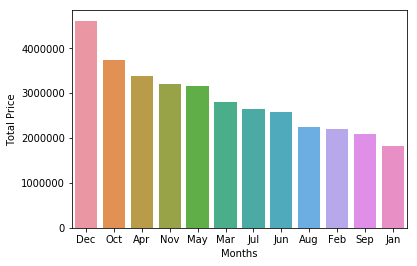

In [183]:
sns.barplot(x=data_months_sale.index,y=data_months_sale['Total Price'])

#### Dec was the best month for sale 

In [18]:
data_product=data.groupby(['Product']).sum()[['Quantity Ordered']].sort_values(by='Quantity Ordered', ascending=False)
data_product

,Quantity Ordered
Product,
AAA Batteries (4-pack),31017
AA Batteries (4-pack),27635
USB-C Charging Cable,23975
Lightning Charging Cable,23217
Wired Headphones,20557
Apple Airpods Headphones,15661
Bose SoundSport Headphones,13457
27in FHD Monitor,7550
iPhone,6849


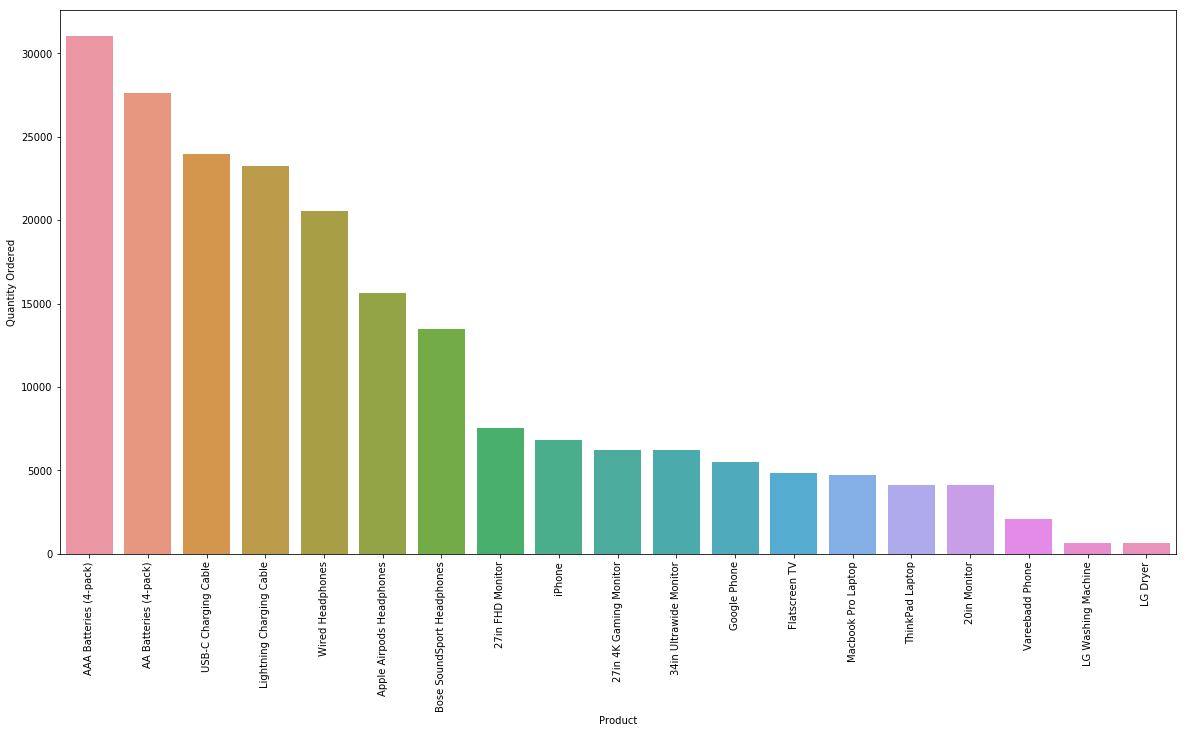

In [19]:
plt.figure(figsize=(20,10))
sns.barplot(x=data_product.index,y=data_product['Quantity Ordered'])
plt.tick_params(axis='x', rotation=90)

## Q2) Which city sold  max products?

In [20]:
data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months,Total Price
0,176558,USB-C Charging Cable,2,11.950,04/19/19 08:46,"917 1st St, Dallas, TX 75001",Apr,23.900
2,176559,Bose SoundSport Headphones,1,99.990,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",Apr,99.990
3,176560,Google Phone,1,600.000,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Apr,600.000
4,176560,Wired Headphones,1,11.990,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Apr,11.990
5,176561,Wired Headphones,1,11.990,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",Apr,11.990
...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.990,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",Sep,8.970
186846,259354,iPhone,1,700.000,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",Sep,700.000
186847,259355,iPhone,1,700.000,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",Sep,700.000
186848,259356,34in Ultrawide Monitor,1,379.990,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",Sep,379.990


In [21]:
data['City']=data["Purchase Address"].apply(lambda x: x.split(',')[1])
data

E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months,Total Price,City
0,176558,USB-C Charging Cable,2,11.950,04/19/19 08:46,"917 1st St, Dallas, TX 75001",Apr,23.900,Dallas
2,176559,Bose SoundSport Headphones,1,99.990,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",Apr,99.990,Boston
3,176560,Google Phone,1,600.000,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Apr,600.000,Los Angeles
4,176560,Wired Headphones,1,11.990,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Apr,11.990,Los Angeles
5,176561,Wired Headphones,1,11.990,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",Apr,11.990,Los Angeles
...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.990,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",Sep,8.970,Los Angeles
186846,259354,iPhone,1,700.000,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",Sep,700.000,San Francisco
186847,259355,iPhone,1,700.000,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",Sep,700.000,San Francisco
186848,259356,34in Ultrawide Monitor,1,379.990,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",Sep,379.990,San Francisco


In [22]:
data.drop(['Purchase Address'],axis=1)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Months,Total Price,City
0,176558,USB-C Charging Cable,2,11.950,04/19/19 08:46,Apr,23.900,Dallas
2,176559,Bose SoundSport Headphones,1,99.990,04/07/19 22:30,Apr,99.990,Boston
3,176560,Google Phone,1,600.000,04/12/19 14:38,Apr,600.000,Los Angeles
4,176560,Wired Headphones,1,11.990,04/12/19 14:38,Apr,11.990,Los Angeles
5,176561,Wired Headphones,1,11.990,04/30/19 09:27,Apr,11.990,Los Angeles
...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.990,09/17/19 20:56,Sep,8.970,Los Angeles
186846,259354,iPhone,1,700.000,09/01/19 16:00,Sep,700.000,San Francisco
186847,259355,iPhone,1,700.000,09/23/19 07:39,Sep,700.000,San Francisco
186848,259356,34in Ultrawide Monitor,1,379.990,09/19/19 17:30,Sep,379.990,San Francisco


In [24]:
data_city=data.groupby(['City']).sum()[['Total Price']].sort_values(by='Total Price', ascending=False)
data_city.style.background_gradient(cmap="YlGn")

,Total Price
City,
San Francisco,8262203.910004
Los Angeles,5452570.800002
New York City,4664317.430002
Boston,3661642.010001
Atlanta,2795498.580000
Dallas,2767975.400000
Seattle,2747755.480000
Portland,2320490.610000
Austin,1819581.750000


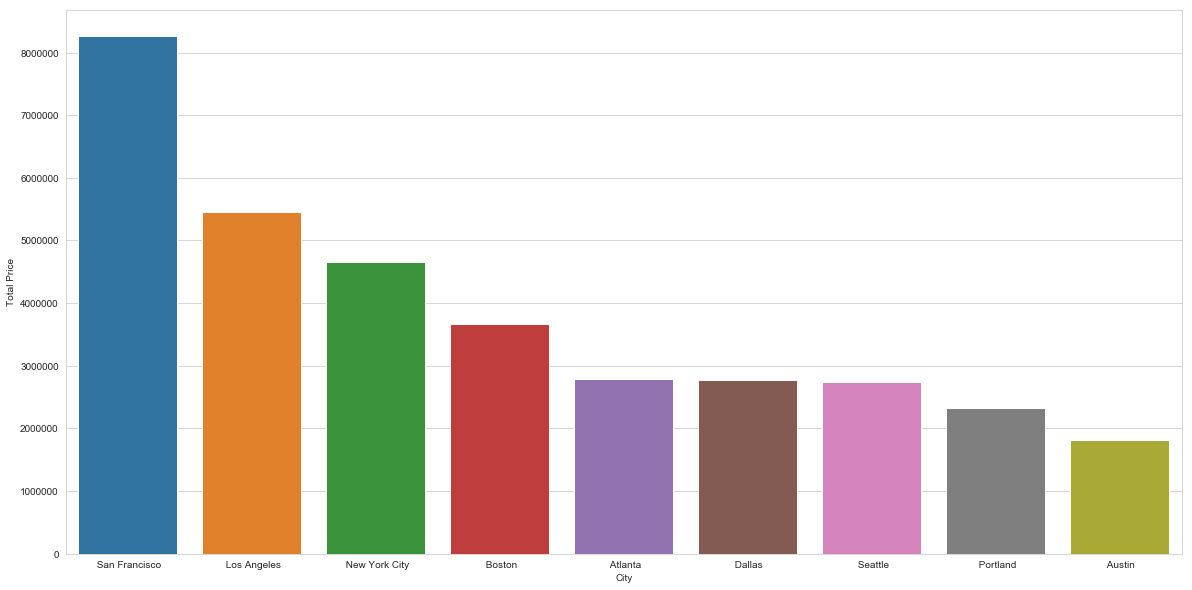

In [28]:
plt.figure(figsize=(20,10))
sns.set_style("whitegrid")
sns.barplot(data_city.index,data_city['Total Price'])


## Question #3: What time should we display advertisements to maximize the likelihood of purchases?  

In [30]:
data['Order Date']=pd.to_datetime(data['Order Date'])
data

E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months,Total Price,City
0,176558,USB-C Charging Cable,2,11.950,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",Apr,23.900,Dallas
2,176559,Bose SoundSport Headphones,1,99.990,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",Apr,99.990,Boston
3,176560,Google Phone,1,600.000,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Apr,600.000,Los Angeles
4,176560,Wired Headphones,1,11.990,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Apr,11.990,Los Angeles
5,176561,Wired Headphones,1,11.990,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",Apr,11.990,Los Angeles
...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.990,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",Sep,8.970,Los Angeles
186846,259354,iPhone,1,700.000,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",Sep,700.000,San Francisco
186847,259355,iPhone,1,700.000,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",Sep,700.000,San Francisco
186848,259356,34in Ultrawide Monitor,1,379.990,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",Sep,379.990,San Francisco


### Grabing Hours from Order date column

In [37]:
data['Hour']=data['Order Date'].dt.hour
data['Minute']=data['Order Date'].dt.minute
data

E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months,Total Price,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.950,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",Apr,23.900,Dallas,8,46
2,176559,Bose SoundSport Headphones,1,99.990,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",Apr,99.990,Boston,22,30
3,176560,Google Phone,1,600.000,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Apr,600.000,Los Angeles,14,38
4,176560,Wired Headphones,1,11.990,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Apr,11.990,Los Angeles,14,38
5,176561,Wired Headphones,1,11.990,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",Apr,11.990,Los Angeles,9,27
...,...,...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.990,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",Sep,8.970,Los Angeles,20,56
186846,259354,iPhone,1,700.000,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",Sep,700.000,San Francisco,16,0
186847,259355,iPhone,1,700.000,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",Sep,700.000,San Francisco,7,39
186848,259356,34in Ultrawide Monitor,1,379.990,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",Sep,379.990,San Francisco,17,30


In [67]:
hours=[hours+1 for hours,df in data.groupby(['Hour']) ]

In [68]:
print(hours)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]


([<matplotlib.axis.XTick at 0xfb8a6e6c50>,
 <a list of 24 Text xticklabel objects>)

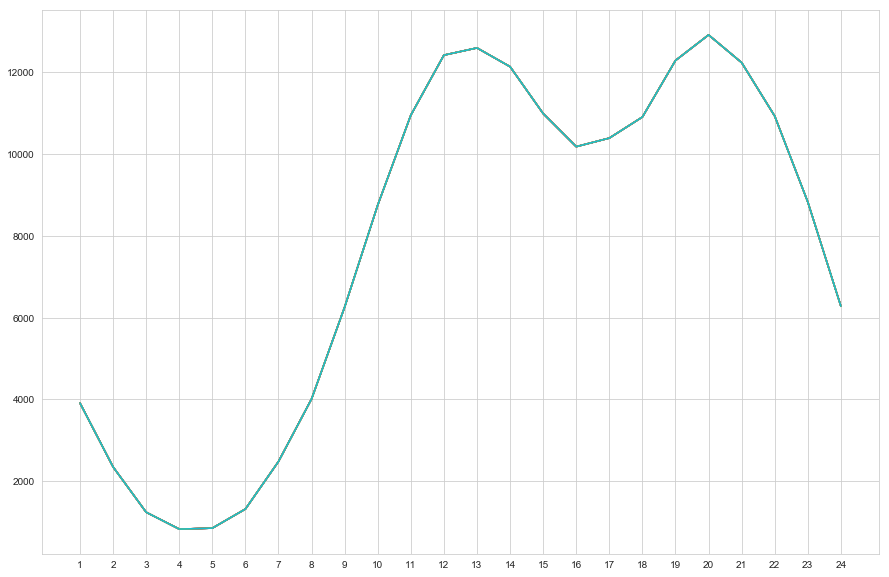

In [69]:
plt.figure(figsize=(15,10))
plt.plot(hours,data.groupby(['Hour']).count())
plt.xticks(hours)

In [77]:
data.groupby('Hour').count()[['Product']].sort_values(by='Product', ascending=False)

,Product
Hour,
19,12905
12,12587
11,12411
18,12280
20,12228
13,12129
14,10984
10,10944
21,10921


### 11am or 7pm-8pm is the best time for advertising because most orders are registered at that time 